In [1]:
import numpy as np
import pandas as pd
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [4]:
df = pd.read_csv('./dataset/Dataset .csv')

In [5]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.shape

(9551, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
for name, dtype in df.dtypes.items():
    print(name, "|",dtype)


Restaurant ID | int64
Restaurant Name | object
Country Code | int64
City | object
Address | object
Locality | object
Locality Verbose | object
Longitude | float64
Latitude | float64
Cuisines | object
Average Cost for two | int64
Currency | object
Has Table booking | object
Has Online delivery | object
Is delivering now | object
Switch to order menu | object
Price range | int64
Aggregate rating | float64
Rating color | object
Rating text | object
Votes | int64


In [13]:
def getting_cat_cols(df):
    cat = []
    for name, dtype in df.dtypes.items():
        if dtype == 'object':
            cat.append(name)
    return cat

In [14]:
cat_cols = getting_cat_cols(df)

In [15]:
cat_cols

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [16]:
lr = LabelEncoder()
def label_encoding(df, cat_cols):
    for i in cat_cols:
        df[i] = lr.fit_transform(df[i])
    return df

In [17]:
df = label_encoding(df, cat_cols)

In [18]:
df.head(2)  

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591


# Aggreate rattings


<Axes: xlabel='Aggregate rating', ylabel='count'>

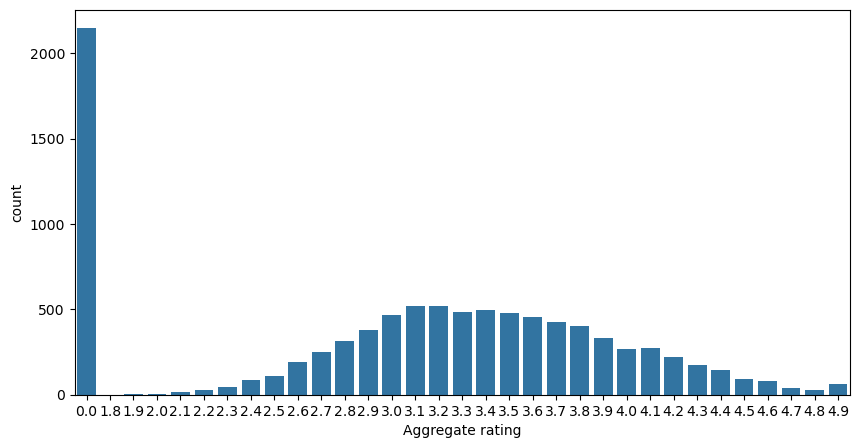

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df, x='Aggregate rating')

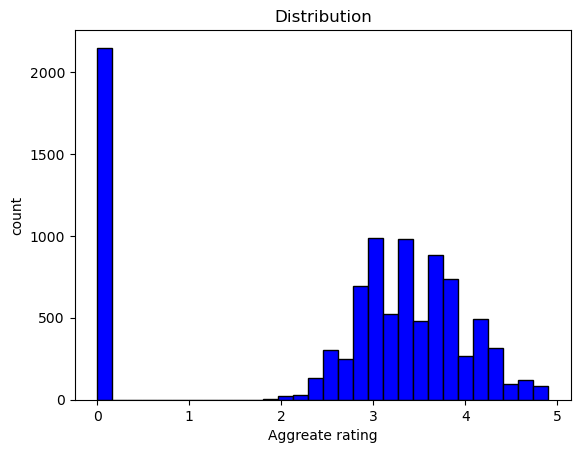

In [20]:
plt.hist(df["Aggregate rating"] ,bins = 30 ,color = 'blue' , edgecolor = 'black' )
plt.xlabel('Aggreate rating')
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [21]:
avg_vote = round(df['Votes'].mean(),3)
print("The average number of votes recived by resturant :" ,avg_vote)

The average number of votes recived by resturant : 156.91


<Axes: >

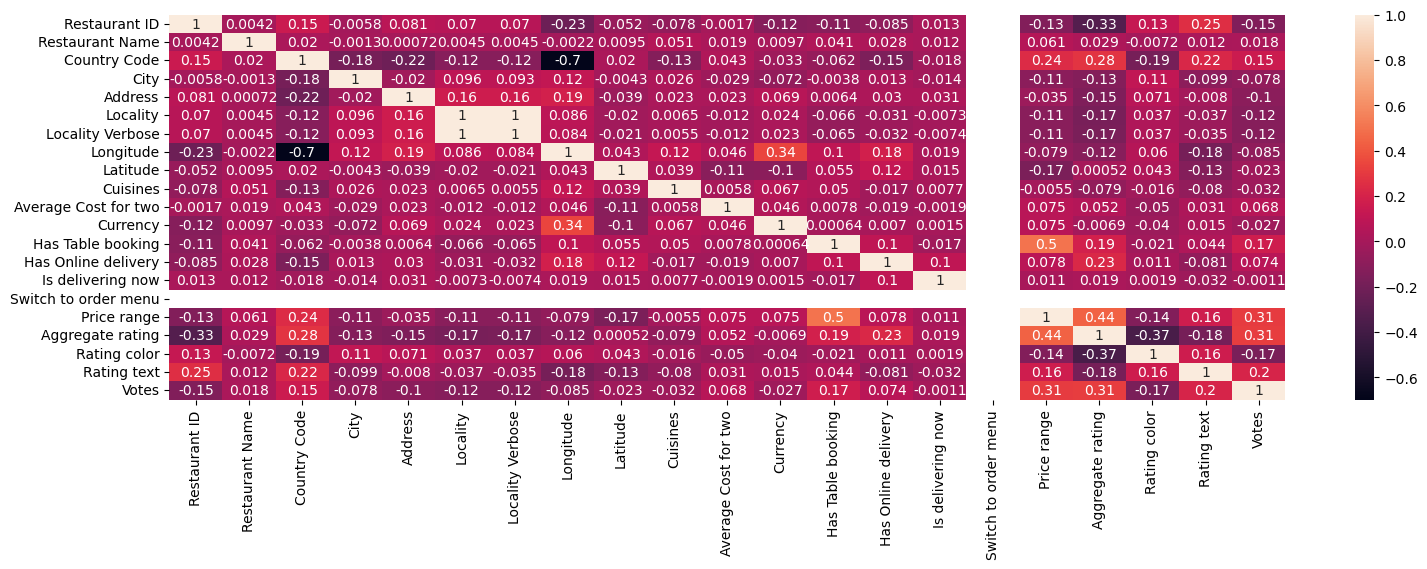

In [22]:
plt.figure(figsize=(18, 5))
sns.heatmap(df.corr(), annot=True)

In [23]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [24]:
x = df.drop(['Restaurant ID', 'Aggregate rating'], axis=1)
y = df['Aggregate rating']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
print(f"X train shpae: {x_train.shape}")
print(f"X test shpae: {x_test.shape}")
print(f"y train shpae: {y_train.shape}")
print(f"y test shpae: {y_test.shape}")

X train shpae: (7640, 19)
X test shpae: (1911, 19)
y train shpae: (7640,)
y test shpae: (1911,)


### Linear Regression 

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(x_test)

In [30]:
print(f"Mean squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy: {r2_score(y_test, y_pred)}")

Mean squared Error: 1.2180878814535836
Mean absolute Error: 0.9169958559619529
Accuracy: 0.46664087572928714


### Random forest

In [31]:
model_rf = RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=42, verbose=True, max_samples=100)

In [32]:
model_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


RandomForestRegressor(max_samples=100, n_estimators=200, random_state=42,
                      verbose=True)

In [33]:
y_pred = model_rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [34]:
print(f"Mean squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy: {r2_score(y_test, y_pred)}")

Mean squared Error: 0.034332700941915206
Mean absolute Error: 0.13237571951857674
Accuracy: 0.9849668816289542


<Axes: >

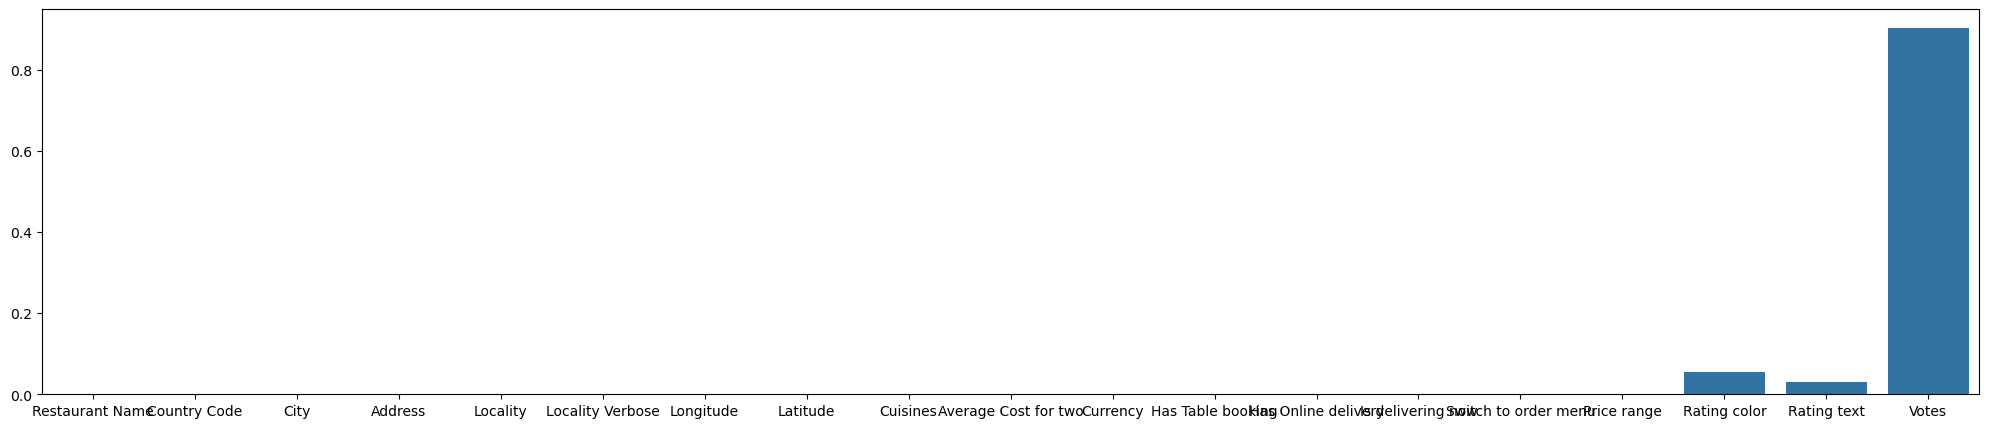

In [35]:
plt.figure(figsize=(25,5))
sns.barplot(x=model_rf.feature_names_in_, y=model_rf.feature_importances_)

In [47]:
with open('./model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

## Task 3

In [ ]:
print(df[["Longitude" , "Latitude"]])

In [23]:
gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

In [ ]:
print(gdf.head())

In [ ]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color = 'White', edgecolor = 'black')
gdf.plot(ax = ax, marker = 'o',color ='red',markersize = 6)
plt.show()

In [29]:
world_map = folium.Map(location = [df['Latitude'].mean(),df['Longitude'].mean()], zoom_start = 1 ,height = '100%',width = '100%')

In [ ]:
heat_marker = [[row['Latitude'], row['Longitude'] ]for i,row in df.iterrows()]
HeatMap(heat_marker, radius = 10).add_to(world_map)

In [ ]:
world_map

# Task 4

In [34]:
resturant_chain = df.groupby('Restaurant Name').size().reset_index(name = 'OutletCount')
new = resturant_chain[resturant_chain['OutletCount']>1]
resturant_chain = new.sort_values(by = 'OutletCount', ascending = False)

In [ ]:
print(resturant_chain[['Restaurant Name' , "OutletCount"]].head(10))

In [ ]:
plt.bar(resturant_chain["Restaurant Name"][:5], resturant_chain["OutletCount"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Number of Oulet")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

In [41]:
ratings  = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name = "Average Rating").sort_values(by = "Average Rating", ascending = False )


In [ ]:
Votes = df.groupby("Restaurant Name")['Votes'].sum().reset_index(name = "Total Votes").sort_values(by = "Total Votes",ascending = False)
print(Votes)

In [ ]:
plt.bar(ratings["Restaurant Name"][:5], ratings["Average Rating"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(Votes["Restaurant Name"][:5], Votes["Total Votes"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()